## 使用 scikit-learn 对样本数据进行分类

### Prelude

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "no-latex", "cjk-sc-font"])

In [23]:
def plot_data(X, y):
    plt.figure(figsize=(10, 8))
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    (p1,) = plt.plot(np.ravel(X[pos, 0]), np.ravel(X[pos, 1]), "ro", markersize=8)
    (p2,) = plt.plot(np.ravel(X[neg, 0]), np.ravel(X[neg, 1]), "g^", markersize=8)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend([p1, p2], ["y==1", "y==0"])
    return plt


def plot_decisionBoundary(X, y, model, class_="linear"):
    plt = plot_data(X, y)

    if class_ == "linear":
        w = model.coef_
        b = model.intercept_
        xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        yp = -(w[0, 0] * xp + b) / w[0, 1]
        plt.plot(xp, yp, "b-", linewidth=2.0)
        plt.show()
    else:
        x_1 = np.transpose(
            np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100).reshape(1, -1)
        )
        x_2 = np.transpose(
            np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100).reshape(1, -1)
        )
        X1, X2 = np.meshgrid(x_1, x_2)
        vals = np.zeros(X1.shape)
        for i in range(X1.shape[1]):
            this_X = np.hstack((X1[:, i].reshape(-1, 1), X2[:, i].reshape(-1, 1)))
            vals[:, i] = model.predict(this_X)

        plt.contour(X1, X2, vals, [0, 1])


### 随机生成400个数据点

In [24]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

def get_label(x, y):
    if y < np.sin(x):
        return 1
    return 0

X_rand = np.random.rand(400, 2)
y_rand = np.array([get_label(x, y) for x, y in X_rand])

### 对样本点进行显示

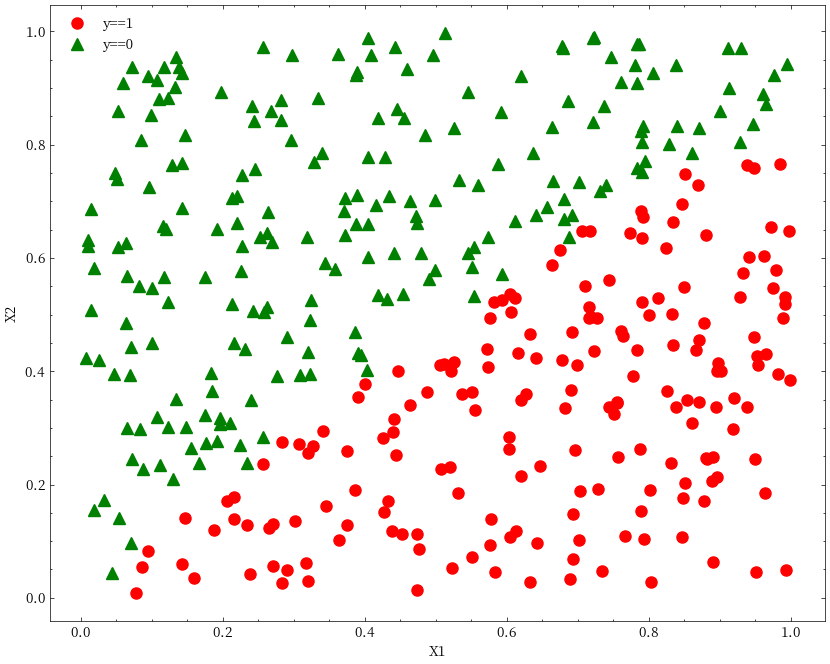

In [25]:
plot_data(X_rand, y_rand)
plt.show()

### 使用线性 SVM 进行二分类并进行评价

In [26]:
X_rand_train, X_rand_test, y_rand_train, y_rand_test = train_test_split(
    X_rand, y_rand, test_size=0.2, random_state=0
)
linear_svc = LinearSVC(dual="auto").fit(X_rand_train, y_rand_train)
linear_svc.score(X_rand_test, y_rand_test)

0.975

### 画出决策边界

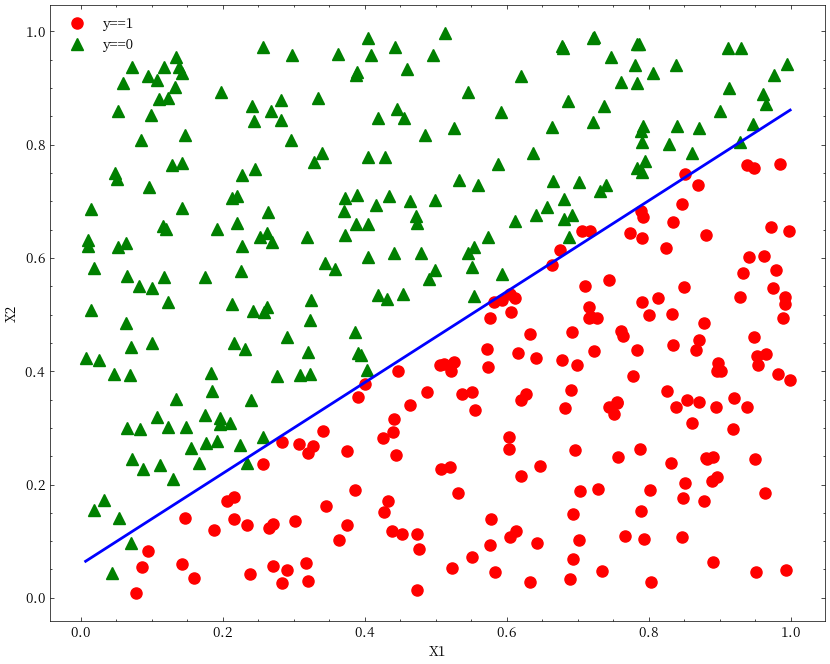

In [27]:
plot_decisionBoundary(X_rand, y_rand, linear_svc, class_='linear')

## 对葡萄酒数据集进行分类

### 对数据集进行分割，20%用于测试

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine, y_wine = wine.data, wine.target

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=0)

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

available_kernels = ["linear", "poly", "rbf", "sigmoid"]


def get_kernel_score(kernel_name):
    wine_svc = make_pipeline(StandardScaler(), SVC(kernel=kernel_name)).fit(
        X_wine_train, y_wine_train
    )
    return wine_svc.score(X_wine_test, y_wine_test)


kernel_scores_on_wine = [get_kernel_score(kernel) for kernel in available_kernels]

kernel_score_table = pd.DataFrame(
    kernel_scores_on_wine, index=available_kernels, columns=["Score"]
)
kernel_score_table

,Score
linear,1.000000
poly,0.944444
rbf,1.000000
sigmoid,0.972222


## 分别使用KNN、决策树、朴素贝叶斯和SVM分类方法对鸢尾花数据集进行分类

KNN: 1.0
GaussianNB: 0.8666666666666667
Decision Tree: 0.9333333333333333
Support Vector Machine: 0.9666666666666667


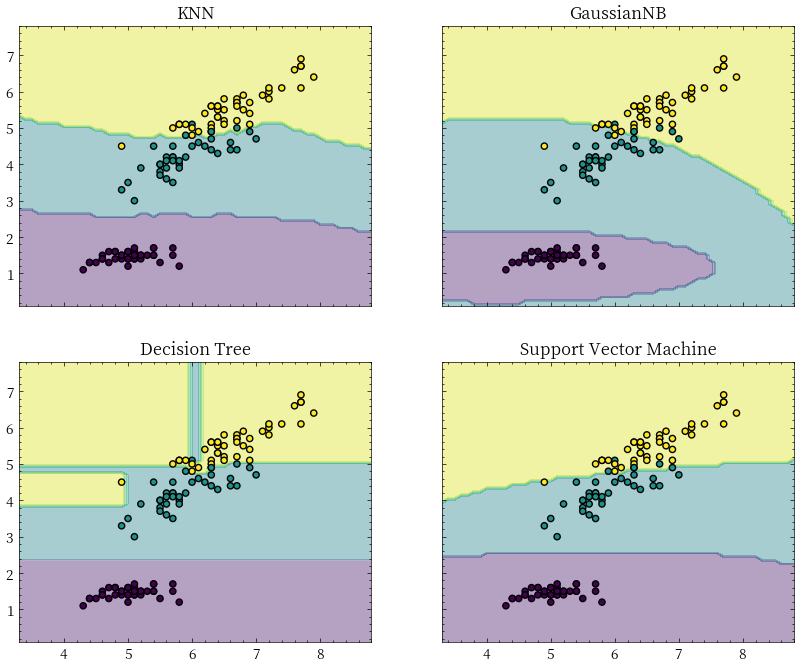

In [43]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from itertools import product

iris = load_iris()
x_iris_partial = iris.data[:, [0, 2]]
y_iris = iris.target

x_train, x_test, y_train, y_test = train_test_split(
    x_iris_partial, y_iris, test_size=0.2, random_state=0
)

# 定义分类器对象，均使用默认参数
knn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
svm = SVC()
# 训练分类器
knn.fit(x_train, y_train)
gnb.fit(x_train, y_train)
dtc.fit(x_train, y_train)
svm.fit(x_train, y_train)
# 测试并输出准确率
print("KNN:", knn.score(x_test, y_test))
print("GaussianNB:", gnb.score(x_test, y_test))
print("Decision Tree:", dtc.score(x_test, y_test))
print("Support Vector Machine:", svm.score(x_test, y_test))
# 获取测试点范围
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
# 生成测试点
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# 设置子图
f, axe = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
# 测试全部测试点并将分类结果作为颜色参数绘制结果图
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [knn, gnb, dtc, svm],
    ["KNN", "GaussianNB", "Decision Tree", "Support Vector Machine"],
):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axe[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axe[idx[0], idx[1]].scatter(
        x_train[:, 0], x_train[:, 1], c=y_train, s=20, edgecolor="k"
    )
    axe[idx[0], idx[1]].set_title(tt)
plt.show()


## 创建可分离的样本数据集

In [31]:
def plot_difference(f):
    X, y= f()

    kernel_range = ["linear", "poly", "rbf", "sigmoid"]
    c_range = [0.1, 1, 10]

    fig, axes = plt.subplots(len(kernel_range), len(c_range), figsize=(15, 20))

    for i in range(len(kernel_range)):
        for j in range(len(c_range)):
            xx, yy = np.meshgrid(
                np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1),
            )
            svc = SVC(kernel=kernel_range[i], C=c_range[j]).fit(X, y)
            axes[i, j].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
            axes[i, j].contourf(xx, yy, svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.4)
            axes[i, j].set_title(f"Kernel: {kernel_range[i]}, C: {c_range[j]}")
            axes[i, j].axis("off")
    plt.show()

### make_blobs

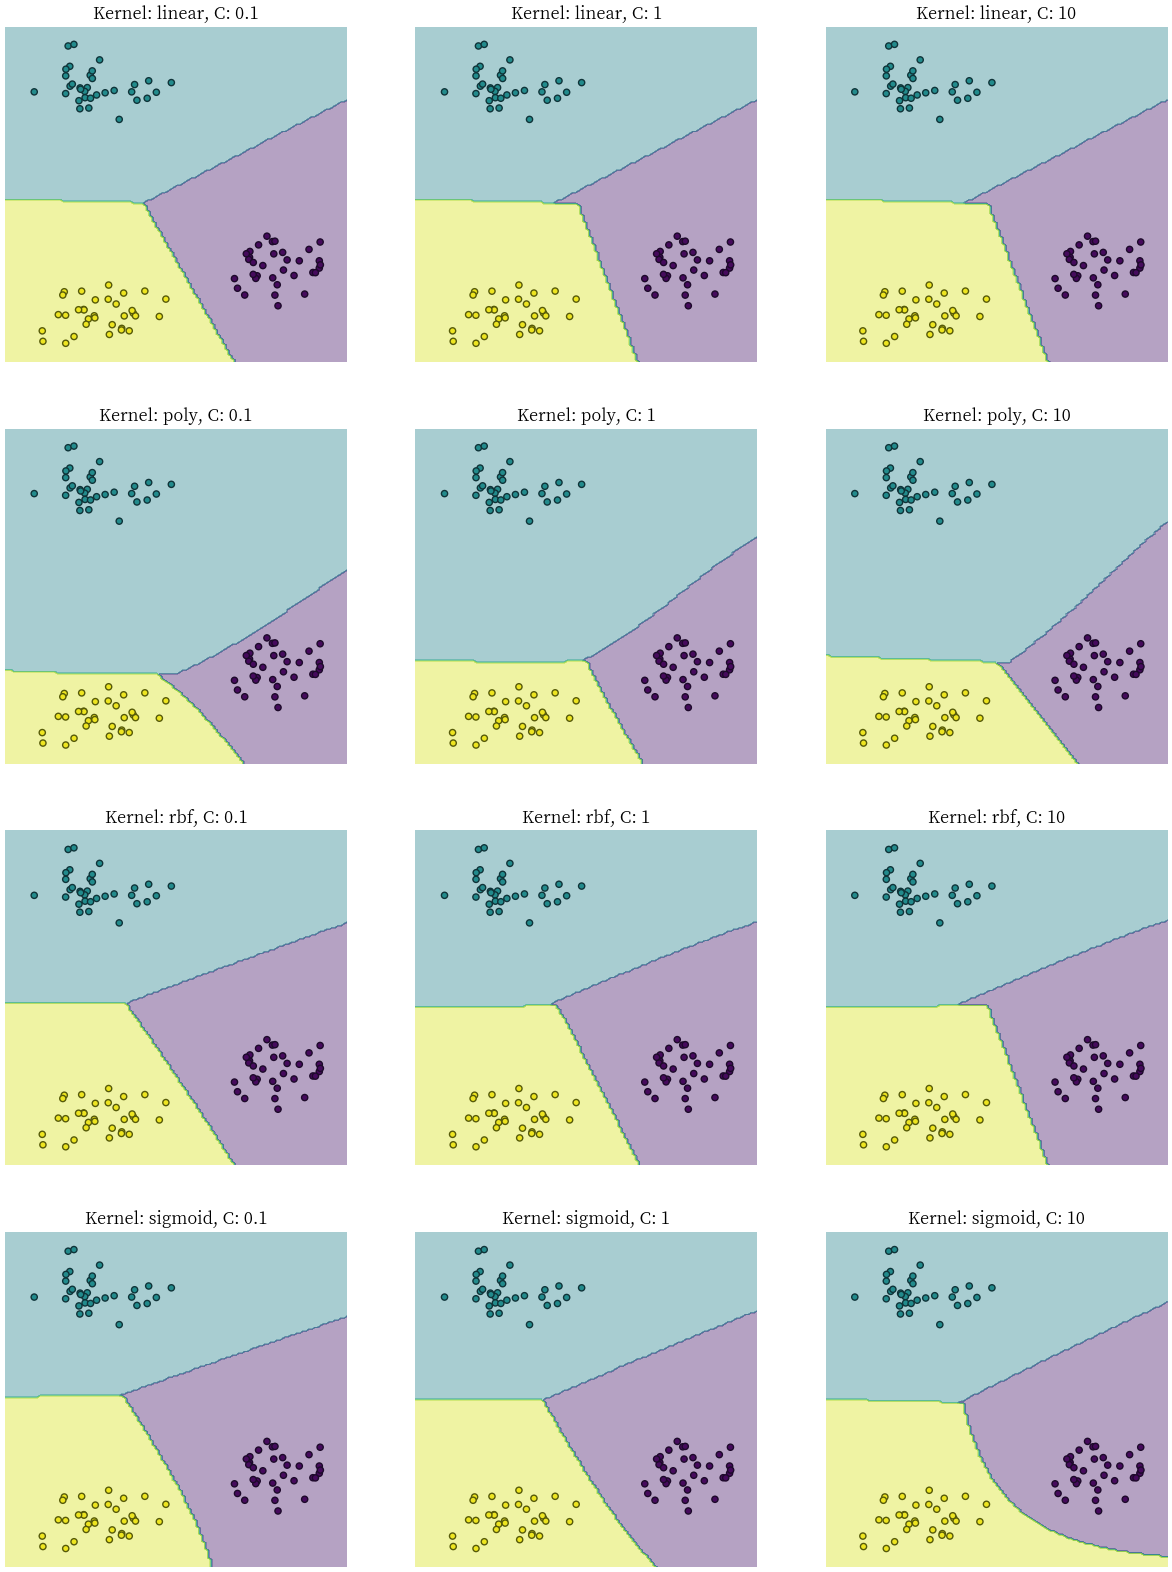

In [32]:
from sklearn.datasets import make_blobs
plot_difference(make_blobs)

### make_circles

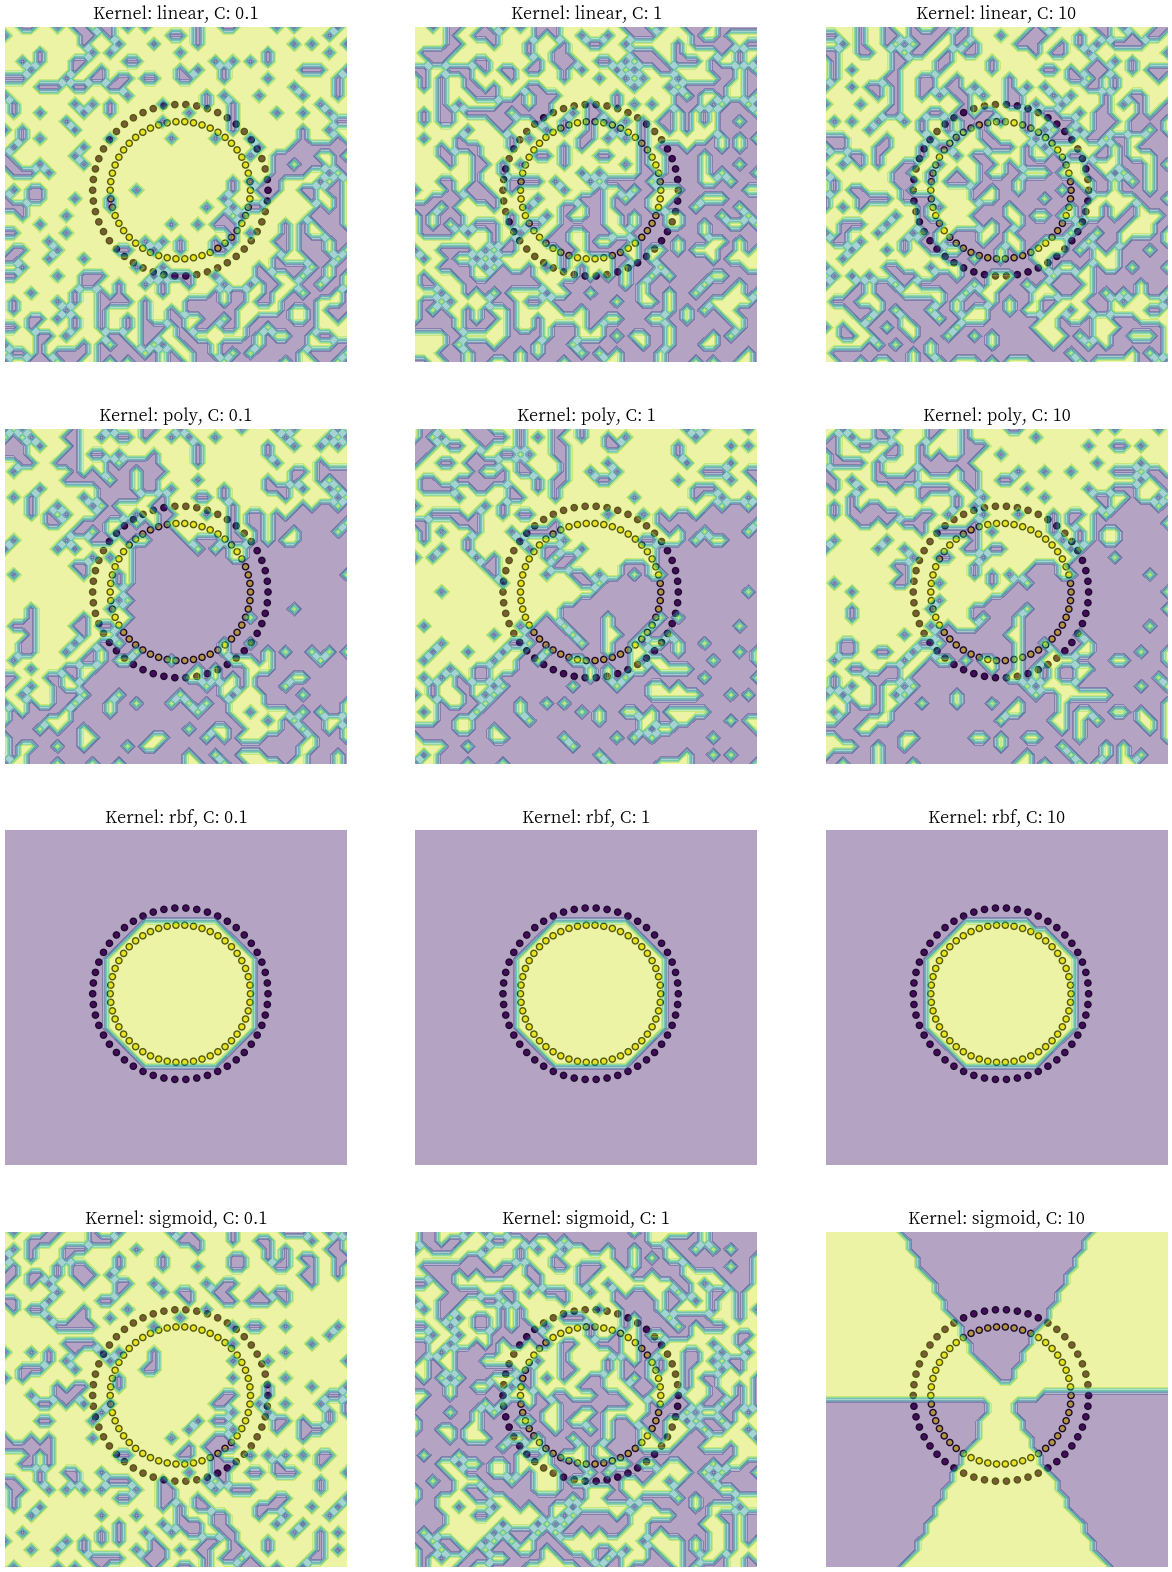

In [33]:
from sklearn.datasets import make_circles
plot_difference(make_circles)

### make_moons

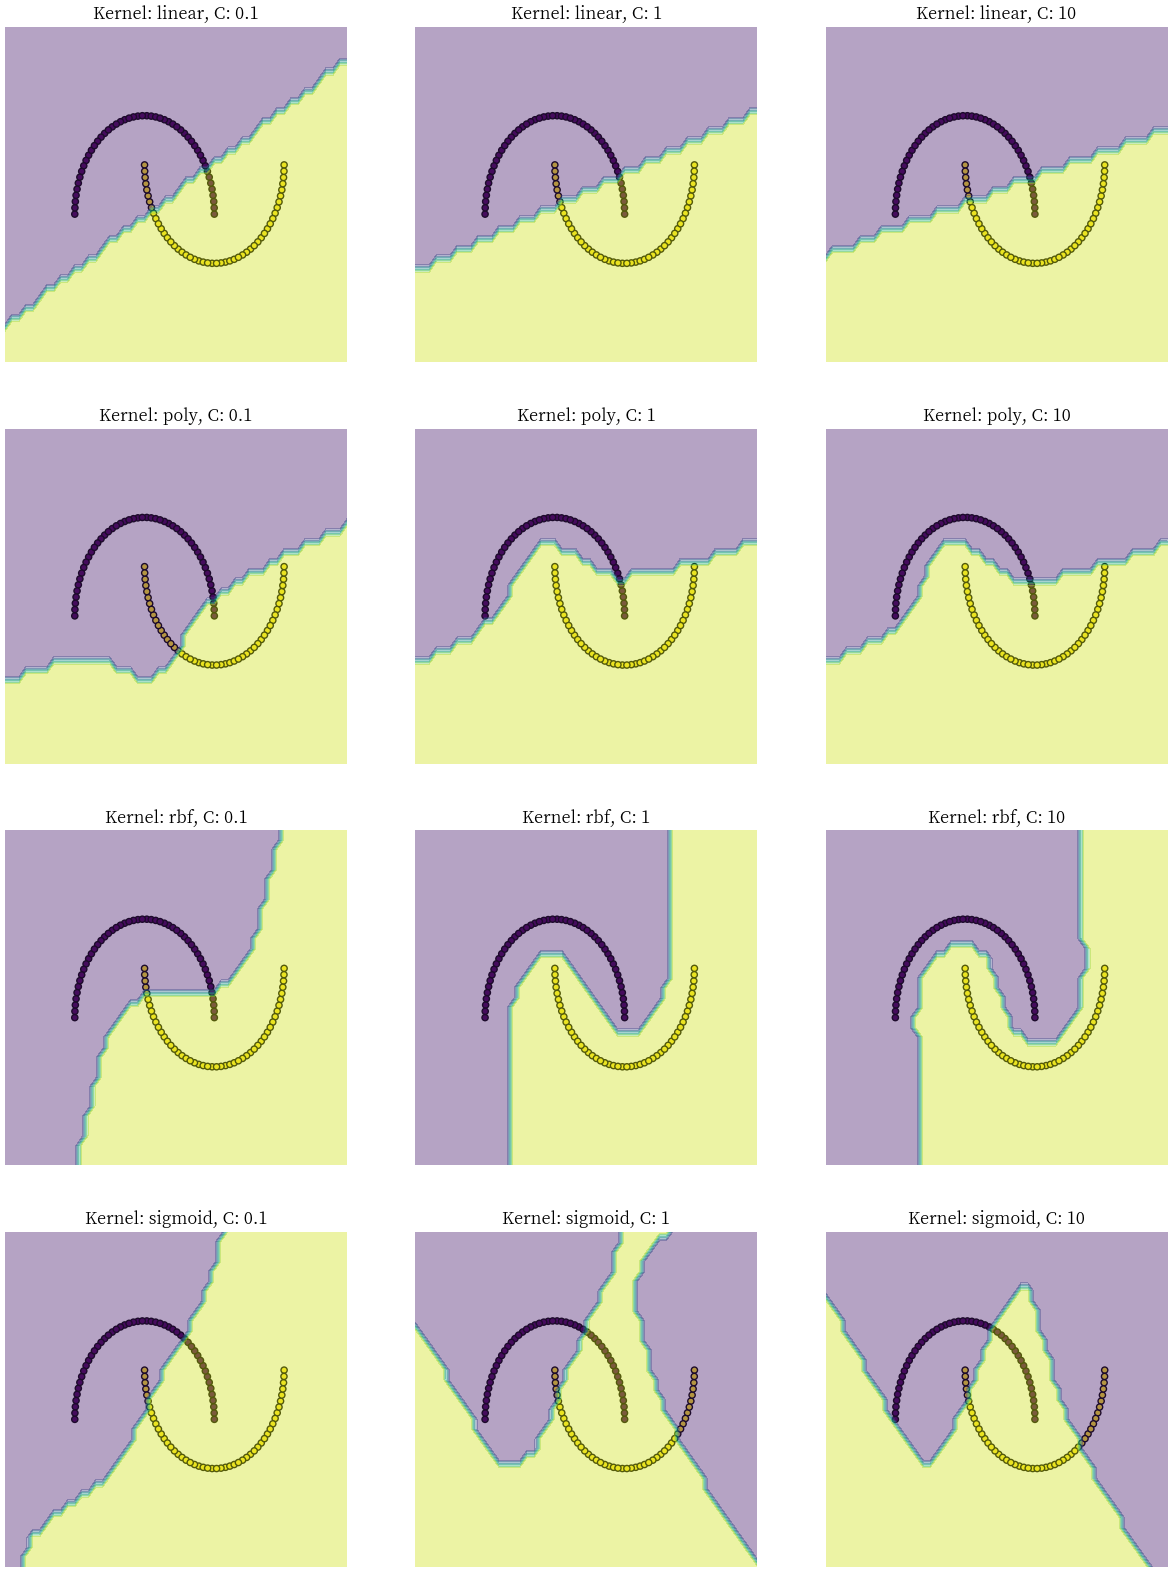

In [34]:
from sklearn.datasets import make_moons
plot_difference(make_moons)